In [1]:
from sklearn import datasets
X,y=datasets.make_blobs(n_samples=200,centers=[[5,5],[10,10]],cluster_std=1.5);

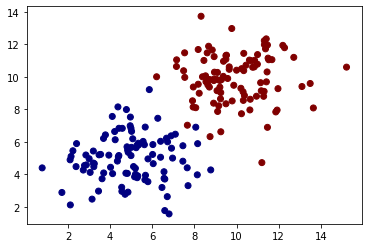

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array(X);
a,b=X.T;
plt.scatter(a,b,c=y,cmap='jet')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
import torch
X_train=torch.from_numpy(X_train.astype(np.float32))
Y_train=torch.from_numpy(Y_train.astype(np.float32))
X_test=torch.from_numpy(X_test.astype(np.float32))
Y_test=torch.from_numpy(Y_test.astype(np.float32))
Y_train=Y_train.view(Y_train.shape[0],1)
Y_test=Y_test.view(Y_test.shape[0],1)

In [4]:
class NeuralNetworkModel(torch.nn.Module):
 def __init__(self):
   super(NeuralNetworkModel,self).__init__()
   self.layer1=torch.nn.Linear(2,5);
   self.layer2=torch.nn.Linear(5,5);
   self.layer3=torch.nn.Linear(5,1);
 def forward(self,x):
   y_hat=torch.sigmoid(self.layer1(x))
   y_hat=torch.sigmoid(self.layer2(y_hat))
   y_hat=torch.sigmoid(self.layer3(y_hat))
   return y_hat
 def func(self,x):
   t=torch.sigmoid(self.layer1(x))
   t=torch.sigmoid(self.layer2(t))
   return t;

In [5]:
def plotmodel():
  x_min, x_max = 0, 20
  y_min, y_max = 0, 20
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
  fig, ax = plt.subplots()
  Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
  Z = Z>0.5;
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  ax.scatter(X[:, 0], X[:, 1], c=y)

In [6]:
model=NeuralNetworkModel()
criterion=torch.nn.BCELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [7]:
number_of_epochs=12000
for epoch in range(number_of_epochs):
 y_prediction=model(X_train)
 loss=criterion(y_prediction,Y_train)
 loss.backward()
 optimizer.step()
 optimizer.zero_grad()
 if (epoch+1)%1000 == 0:
   print('epoch:', epoch+1,',loss=',loss.item())

epoch: 1000 ,loss= 0.6869474649429321
epoch: 2000 ,loss= 0.6813347339630127
epoch: 3000 ,loss= 0.673474133014679
epoch: 4000 ,loss= 0.6620667576789856
epoch: 5000 ,loss= 0.6449376940727234
epoch: 6000 ,loss= 0.6187579035758972
epoch: 7000 ,loss= 0.5752435326576233
epoch: 8000 ,loss= 0.5078522562980652
epoch: 9000 ,loss= 0.4184933304786682
epoch: 10000 ,loss= 0.32358518242836
epoch: 11000 ,loss= 0.24388065934181213
epoch: 12000 ,loss= 0.1860412061214447


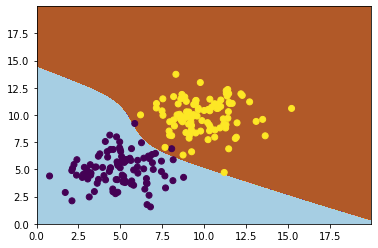

In [8]:
plotmodel()

In [9]:
parm={}
for name, param in model.named_parameters():
  parm[name]=param.detach()
w=parm['layer3.weight'][0]
w=torch.div(w,w.norm(dim=0,p=2))
print(w)

tensor([-0.5427, -0.6614,  0.1054,  0.5068, -0.0084])


In [10]:
x0=torch.rand((1,2),requires_grad=True)
x0.requires_grad
x1_hist=[]
x2_hist=[]
x=[]
optimizer=torch.optim.SGD([x0],lr=0.1,momentum=0)
for i in range(30000):
      optimizer.zero_grad();
      loss=-model(x0);
      loss.backward();
      optimizer.step();
      if(i%3000==0):
        u=x0[0].clone().detach().numpy();
        x1_hist.append(u[0])
        x2_hist.append(u[1])
        x.append(u)
xt=x0.detach().numpy();

In [11]:
def model_plot1(model,X,y,title,x1_hist,x2_hist):  
    x_min, x_max = 0, 20
    y_min, y_max = 0, 20
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
    Z = model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float())
    Z = Z>0.5;
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y,cmap='jet')
    plt.scatter(x1_hist,x2_hist,c='y',cmap='jet')
    plt.plot(x1_hist,x2_hist)
    plt.title(title)
    plt.show()

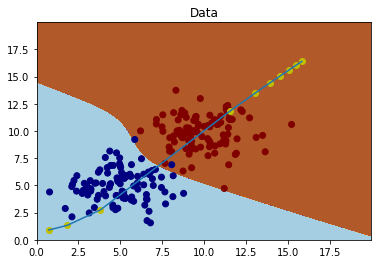

In [12]:
model_plot1(model,X,y,'Data',x1_hist,x2_hist)

In [13]:
print(w)
X_path=torch.Tensor(x)
X_path.shape
Output_path=model.func(X_path)
for i in range(9):
  v=Output_path[i+1]-Output_path[0]
  print(torch.div(v,v.norm(dim=0,p=2)))

tensor([-0.5427, -0.6614,  0.1054,  0.5068, -0.0084])
tensor([-0.4654, -0.4834,  0.0575,  0.5870, -0.4492], grad_fn=<DivBackward0>)
tensor([-0.5327, -0.5419,  0.0955,  0.5952, -0.2432], grad_fn=<DivBackward0>)
tensor([-0.5843, -0.6297,  0.0893,  0.5012, -0.0539], grad_fn=<DivBackward0>)
tensor([-0.5848, -0.6283,  0.0908,  0.5021, -0.0539], grad_fn=<DivBackward0>)
tensor([-0.5850, -0.6277,  0.0915,  0.5025, -0.0542], grad_fn=<DivBackward0>)
tensor([-0.5851, -0.6273,  0.0918,  0.5027, -0.0544], grad_fn=<DivBackward0>)
tensor([-0.5852, -0.6270,  0.0921,  0.5029, -0.0546], grad_fn=<DivBackward0>)
tensor([-0.5852, -0.6268,  0.0923,  0.5030, -0.0548], grad_fn=<DivBackward0>)
tensor([-0.5853, -0.6267,  0.0924,  0.5031, -0.0549], grad_fn=<DivBackward0>)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  
